# Computer Lab 2, Part I

This notebook consists of instructions, exercises and questions that form the practical part of Lab II, Part I. In this assignment, you will learn the basics of the OpenStack Python APIs that can be used to interact directly with the IaaS services Keystone (Identity), Glance (Image) and Nova (compute). Please prepare your solution and answers to questions directly in this notebook, and export it to PDF. Upload that PDF as to the student portal to complete Part I of the Lab.  

## Task - 1

In [1]:
from os import environ as env
import keystoneclient.v3.client as ksclient
from novaclient import client
from novaclient import extension
from novaclient.v2 import instance_action
from keystoneauth1 import session
from keystoneauth1 import loading
from swiftclient import Connection
import time
PWD = "Instagram12"

To establish a client connection, we will need to pass a dictionary with information about the tenant, user, credentials and the API Identity endpoint. Here, I have sourced the "openrc.sh file" obtained from the Horizon dashboard in the underlying shell prior to starting the notebook. Hence, in order to actually run the code below, you would need to do the same with your own credentials. 

In [2]:
keystone = ksclient.Client(auth_url="https://uppmax.cloud.snic.se:5000/v3",
                           username="s10763",
                           password='Instagram12',
                           project_name="SNIC 2018/10-30",
                           project_domain_name='snic',
                           project_id='2344cddf33a1412b846290a9fb90b762',
                           version='3',
                           user_domain_name="snic",
                           region_name='UPPMAX')

In [11]:
endpoints = keystone.service_catalog.get_endpoints()

In [12]:
for endpoint in endpoints:
    for edp in endpoints[endpoint]:
        if edp['interface'] == 'internal':
            print("internal \n")
            print ('service: ', endpoint, ', region: ', edp['region'], ', public endpoint: ', edp['url'])
            print("\n")
        elif edp['interface'] == 'public':
            print("public \n")
            print('service: ', endpoint, ', region: ', edp['region'], ', public endpoint: ', edp['url'])
            print("\n")
        

public 

service:  cloudformation , region:  UPPMAX , public endpoint:  https://uppmax.cloud.snic.se:8000/v1


internal 

service:  cloudformation , region:  UPPMAX , public endpoint:  http://172.24.0.165:8000/v1


internal 

service:  metering , region:  UPPMAX , public endpoint:  http://172.24.0.165:8777


public 

service:  metering , region:  UPPMAX , public endpoint:  https://uppmax.cloud.snic.se:8777


internal 

service:  compute , region:  UPPMAX , public endpoint:  http://172.24.0.165:8774/v2.1/2344cddf33a1412b846290a9fb90b762


public 

service:  compute , region:  UPPMAX , public endpoint:  https://uppmax.cloud.snic.se:8774/v2.1/2344cddf33a1412b846290a9fb90b762


internal 

service:  network , region:  UPPMAX , public endpoint:  http://172.24.0.165:9696


public 

service:  network , region:  UPPMAX , public endpoint:  https://uppmax.cloud.snic.se:9696


public 

service:  object-store , region:  UPPMAX , public endpoint:  https://uppmax.cloud.snic.se:8080/v1/AUTH_2344cddf33

## Questions:

## Task - 2

In this task you need to write a small python program using Keystone and Nova APIs to list all the available VMs in the project. 

Use the following links and the code available in Task-1. 

https://docs.openstack.org/python-novaclient/pike/ https://docs.openstack.org/python-novaclient/pike/reference/api/index.html

Following are the functions required to accomplish the task: 

Load the required plugin:<br />
loader = loading.get_plugin_loader(...)

Create the auth object:<br />
auth = loader.load_from_options(....) 

Create session object using "auth":<br />
sess = session.Session( .... )

Create Nova Client Object:<br />
nova = client.Client( ... )

Print the Vms:<br />
nova.servers.list():

In [7]:
loader = loading.get_plugin_loader('password')
ia_extensions = [
        extension.Extension(instance_action.__name__.split(".")[-1],
                            instance_action),
]
auth = loader.load_from_options(auth_url="https://uppmax.cloud.snic.se:5000/v3",
                                username="s10763",
                                 password=PWD,
                                 project_id='2344cddf33a1412b846290a9fb90b762',
                                 project_domain_name="snic",
                                project_domain_id="snic",
                                 user_domain_name="snic")
sess = session.Session(auth=auth)
nova = client.Client("2", session=sess,extensions=ia_extensions)
#nova.instance_action.list("5a47d5cc-cda2-4721-b280-b459bb50dd81")
nova.servers.list()

[<Server: philip_c3>,
 <Server: MinhPham_VM1>,
 <Server: monains>,
 <Server: fabian_c3_v3>,
 <Server: fabian_c3_v2>,
 <Server: swatilab2>,
 <Server: fgolander-c3-2>,
 <Server: ACC16-spark_worker>,
 <Server: ACC16-spark_master>,
 <Server: ACC16-ansible_master>,
 <Server: malina>,
 <Server: alst4459-lab-3-stack-worker-wi4bv6b7uqp7>,
 <Server: alst4459-lab-3-stack-master-peuakguudbrz>,
 <Server: group2_SM>,
 <Server: group2_SW>,
 <Server: Sundman_Project>,
 <Server: group2_AM>,
 <Server: hungphan_vm1>,
 <Server: nurre>,
 <Server: joc3_2>,
 <Server: fgolander_c3>,
 <Server: anu_project>,
 <Server: Ae>,
 <Server: dimitric2>,
 <Server: Ghand_C3>,
 <Server: tim_c1_ubuntu>,
 <Server: ACC-group11>,
 <Server: superSecretInstance>,
 <Server: PalmC3>,
 <Server: g13-01>,
 <Server: swativm-docker1>,
 <Server: swativm-docker1>,
 <Server: alroscript-my_instance1-ncamg2c3gbfd>,
 <Server: alroscript-my_instance0-q2x264ygaxpp>,
 <Server: myscript-my_instance0-34dfkhkqye47>,
 <Server: myscript-my_instance

## Task - 3:

Try to measure the speed with which you can put and get files to and from volumes. Conduct your experiment several times to gather statistic and plot a) A estimated distribution of the time taken (in wall clock) to write and read a file of size 10MB in your volume and b) vary the size of the file from 10kB to 100MB and plot the read and write throughput (in MB/s) times as a function of file size (for the smaller data sizes, you might need to repeat the experiment many times and obtain a statistical average). Use "Root" disk as a reference point. Include the resulting graphs and a description of your experiment in the report.

Populating the interactive namespace from numpy and matplotlib


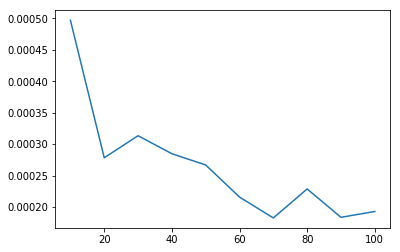

In [9]:
# Implement you solution here. Hint, the following command
%pylab inline 
loader = loading.get_plugin_loader('password')
auth = loader.load_from_options(auth_url="https://uppmax.cloud.snic.se:5000/v3",
                                username="s10763",
                                 password=PWD,
                                 project_id='2344cddf33a1412b846290a9fb90b762',
                                 project_domain_name="snic",
                                project_domain_id="snic",
                                 user_domain_name="snic")
sess = session.Session(auth=auth)
nova = client.Client("2", session=sess)
swift = Connection(session=keystone)

# will  make matplotlib/pylab available and plots will be displayed directly in the notebook, for example


start1 = time.time()
#10MB
with open("myTestFile.txt", "wb") as f:
    f.seek(1048575*10)
    f.write(b'0')

end1 = time.time()
result_time1 = end1 - start1

start2 = time.time()
#20MB
with open("myTestFile1.txt", "wb") as f:
    f.seek(1048575*20)
    f.write(b'0')
end2 = time.time()
result_time2 = end2 - start2

start3 = time.time()
#30MB
with open("myTestFile2.txt", "wb") as f:
    f.seek(1048575*30)
    f.write(b'0')

end3 = time.time()
result_time3 = end3 - start3

start4 = time.time()
#40MB
with open("myTestFile3.txt", "wb") as f:
    f.seek(1048575*40)
    f.write(b'0')

end4 = time.time()
result_time4 = end4 - start4

start5 = time.time()
#50MB
with open("myTestFile4.txt", "wb") as f:
    f.seek(1048575*50)
    f.write(b'0')

end5 = time.time()
result_time5 = end5 - start5

start6 = time.time()
#60MB
with open("myTestFile5.txt", "wb") as f:
    f.seek(1048575*60)
    f.write(b'0')

end6 = time.time()
result_time6 = end6 - start6

start7 = time.time()
#70MB
with open("myTestFile6.txt", "wb") as f:
    f.seek(1048575*70)
    f.write(b'0')

end7 = time.time()
result_time7 = end7 - start7

start8 = time.time()
#80MB
with open("myTestFile7.txt", "wb") as f:
    f.seek(1048575*80)
    f.write(b'0')

end8 = time.time()
result_time8 = end8 - start8

start9 = time.time()
#90MB
with open("myTestFile8.txt", "wb") as f:
    f.seek(1048575*90)
    f.write(b'0')

end9 = time.time()
result_time9 = end9 - start9

start10 = time.time()
#100MB
with open("myTestFile9.txt", "wb") as f:
    f.seek(1048575*100)
    f.write(b'0')

end10 = time.time()
result_time10 = end10 - start10


plt.plot([10,20,30,40,50,60,70,80,90,100],[result_time1,result_time2,result_time3,result_time4,result_time5,result_time6,result_time7,result_time8,result_time9,result_time10])

Don't foget to terminate resources after your experiments. 

In [ ]:
# Clean up volumes